<a href="https://colab.research.google.com/github/manbradcalf/CoLab-Random/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__() # instantiate our nn.Module
        # fc = fully connected
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        # rectified linear unit
        # says "ok do something, if the output is < 0, use 0, else, pass"
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [13]:
torch.manual_seed(41)
model=Model()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

# change last col from str to int
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

my_df

/tmp/ipython-input-3391980684.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [28]:
# Train Test Split! Set X, Y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [29]:
# convert to numpy arrays
X = X.values
y = y.values
print("X",X)
print("y",y)

X [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=41)

In [32]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [34]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of epochs, lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [39]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [49]:
# Train Model
# Epochs? (one run thru all training data)
epochs = 200
losses = []
for i in range(epochs):
  # Go forward and get prediction
  y_pred = model.forward(X_train)

  # Measure the loss/error
  loss = criterion(y_pred,y_train) # predicted vs training data
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # back propagation: take error rate of forward propagation
  # and feed it back thru the network to fine tune the rates
  # Use "The Benefit of Hindsight" to improve our model
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 Loss: 0.0027228279504925013
Epoch: 10 Loss: 0.0026289233937859535
Epoch: 20 Loss: 0.002538845408707857
Epoch: 30 Loss: 0.0024524745531380177
Epoch: 40 Loss: 0.0023696417920291424
Epoch: 50 Loss: 0.002290185075253248
Epoch: 60 Loss: 0.002213953761383891
Epoch: 70 Loss: 0.0021408223547041416
Epoch: 80 Loss: 0.002070617163553834
Epoch: 90 Loss: 0.002003252971917391
Epoch: 100 Loss: 0.0019385658670216799
Epoch: 110 Loss: 0.001876482623629272
Epoch: 120 Loss: 0.001816817675717175
Epoch: 130 Loss: 0.0017595256213098764
Epoch: 140 Loss: 0.0017044765409082174
Epoch: 150 Loss: 0.001651546685025096
Epoch: 160 Loss: 0.0016007062513381243
Epoch: 170 Loss: 0.0015518104191869497
Epoch: 180 Loss: 0.001504794112406671
Epoch: 190 Loss: 0.0014595688553526998


Text(0.5, 0, 'epoch')

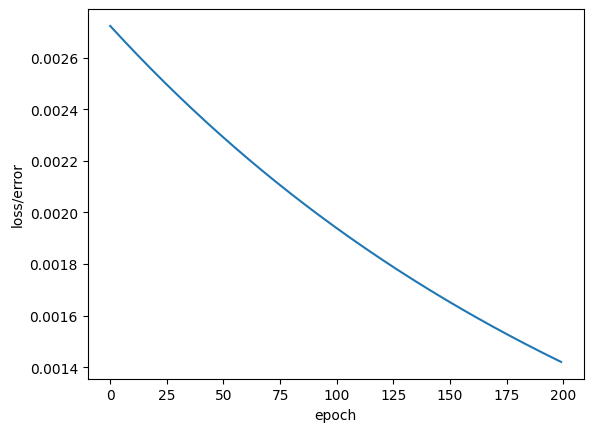

In [50]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")